In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [51]:
df = pd.read_csv('house_data.csv')
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built
0,221900.0,3,1.00,1180,5650,1.0,1180,1955
1,538000.0,3,2.25,2570,7242,2.0,2170,1951
2,180000.0,2,1.00,770,10000,1.0,770,1933
3,604000.0,4,3.00,1960,5000,1.0,1050,1965
4,510000.0,3,2.00,1680,8080,1.0,1680,1987


In [94]:
df['Bias'] = 1

In [95]:
df.shape

(21575, 9)

In [98]:
unorganized = df.sample(frac=1, random_state=1)
unorganized.shape

(21575, 9)

In [99]:
train = unorganized.iloc[:int(0.7*len(unorganized)), :]
train.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,Bias
14473,435000.0,4,2.50,2180,6500,2.0,1410,1945,1
8976,382500.0,4,2.50,2980,8786,2.0,2980,2003,1
13257,162000.0,4,1.00,1460,16638,1.0,1460,1975,1
275,360000.0,4,2.50,2160,9528,2.0,2160,1992,1
19982,739000.0,3,2.50,2310,7348,1.0,2310,2010,1
9638,315000.0,4,1.75,1850,8580,1.0,1140,1960,1
8562,310000.0,1,1.00,570,6000,1.0,570,1918,1
8987,710800.0,3,2.50,2880,36820,2.0,2880,1992,1
18568,1320000.0,4,3.00,2860,10292,1.0,2860,1953,1
20239,308000.0,3,2.50,1250,1150,2.0,1080,2009,1


In [100]:
print(train.shape)

(15102, 9)


In [101]:
test = unorganized.iloc[int(0.7*len(unorganized)): , :]
test.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,Bias
18435,539000.0,5,2.25,2590,7245,1.0,1510,1973,1
10411,650000.0,3,1.75,1840,2310,1.0,1140,1914,1
11995,1260000.0,4,2.00,2970,5400,2.5,2970,1900,1
2889,167000.0,1,1.00,780,10235,1.5,780,1989,1
16779,2570000.0,4,3.75,4475,20424,2.0,2659,1999,1
16546,455000.0,3,2.00,1640,9825,1.0,1090,1971,1
19244,295000.0,3,1.75,2000,7560,1.0,1300,1968,1
5862,595000.0,2,1.50,870,4800,1.0,870,1924,1
18268,440000.0,4,2.50,2880,7386,2.0,2880,1987,1
7578,775000.0,3,2.50,2890,8470,2.0,2890,1996,1


In [102]:
print(test.shape)

(6473, 9)


# Moore Penrose Pseudo Inverse

## Introduction

It is an approximation technique which helps to identify the solutions to the system of linear equations which have no solution between them. 

Here we have **3 Equations** but **2 unknowns** i.e. no. of equations > no. of unknown variables. We can see that each pair of equation intersects at their own point. The three systems of equations do not have a definite solution.
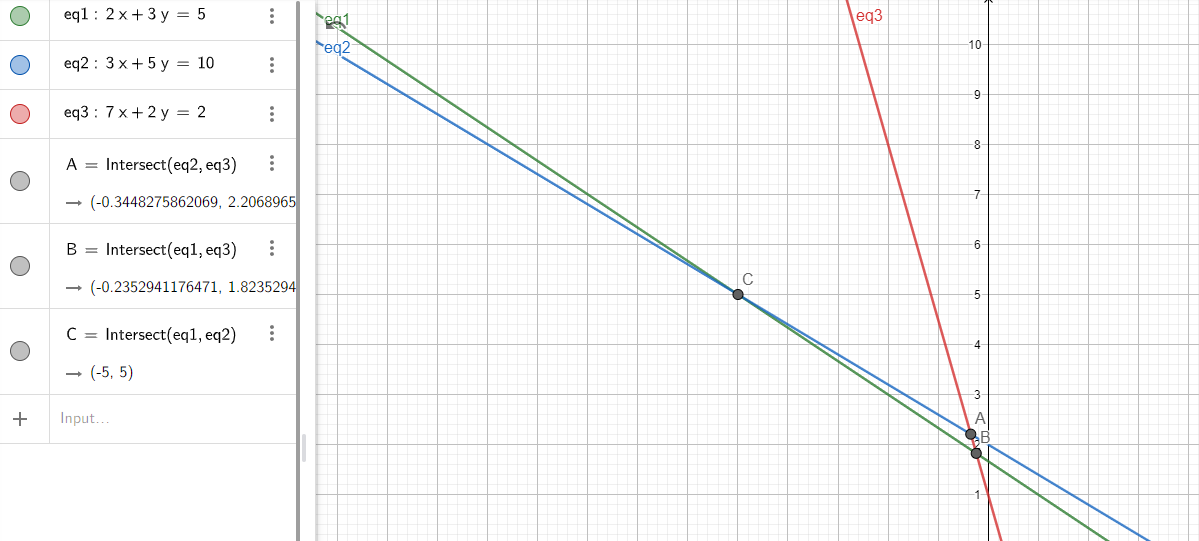

They all intersect at their own points. But, there exixts a point, which is closest to all the three equations, which approximately gives the closest point to all the lines. The point **D** in the following image is such a point, which is closest to all lines, which can be considered as an approximate solution to our system of linear equations. 
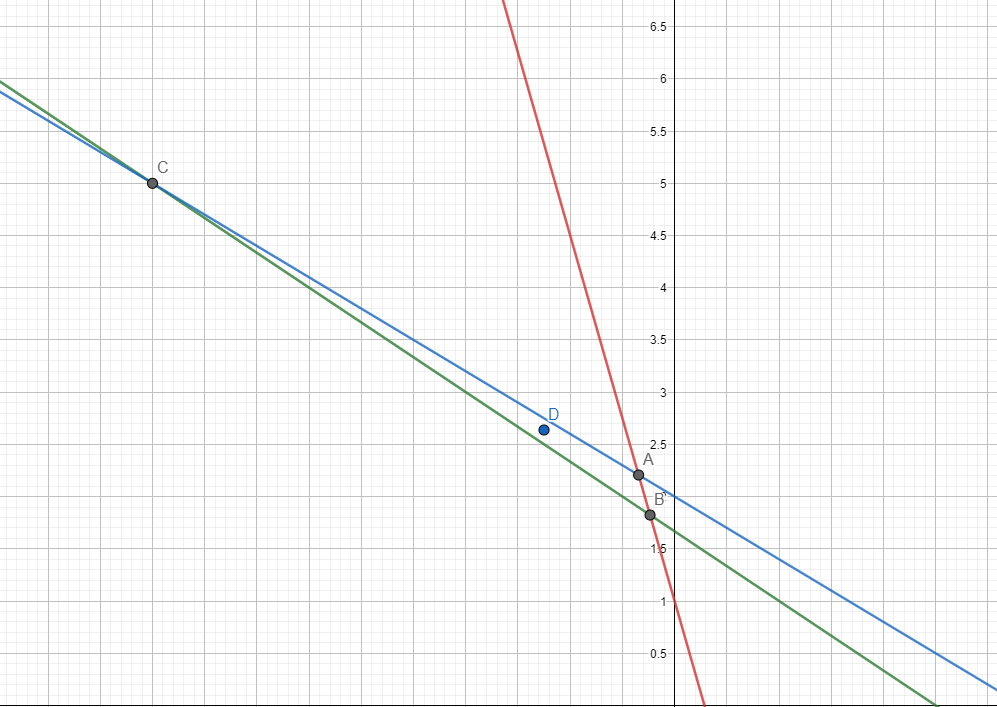

## Relation to our problem: 
Well, we can see that in our data, that we have a feature matrix **A** where we can see that our feature matrix has 15102 rows with 8 features. When we multiply our matrix with a weight vector **Theta** of 8x1 shape; then, we can get our output **y** which is our target vector of shape 15102x1. Our equation will have 15102 linear equations of 8 dimensions, meaning 15102 equations with 8 unknowns. Our system needs to find

y1 = theta1.x1_1 + theta2.x1_2 + theta3.x1_3 + theta4.x1_4 + theta5.x1_6 + theta6.x1_6 + theta7.x1_7 + theta8.x1_8  + theta0<br>
y2 = theta1.x2_1 + theta2.x2_2 + theta3.x2_3 + theta4.x2_4 + theta5.x2_6 + theta6.x2_6 + theta7.x2_7 + theta8.x2_8 + theta0<br>
.<br>
.<br>
.<br>
y15102 = theta1.x15102_1 + theta2.x15102_2 + theta3.x15102_3 + theta4.x15102_4 + theta5.x15102_6 + theta6.x15102_6 + theta7.x15102_7 + theta8.x15102_8 + theta0<br>

Here, theta1, theta2, theta3 and theta4 are the 4 unknowns and there are 105 number of equations.
Thus, we can use the concept of Moore Penrose Matrix Pseudo Inverse to find out the approximate values of Thetas.

## Ok, so how can we compute it?

We know, that A is our feature matrix, Theta is our weight matrix and y is our output. So, the matrix equation that we end up with this is: 

###               A.theta = y
**Multuplying both sides by Ainv**
###              Ainv.A.theta = Ainv.y
### or,        theta = Ainv.y

Mostly, we can not find a perfect inverse of a matrix. So, we find the pseudo inverse of that matrix, which is given by:

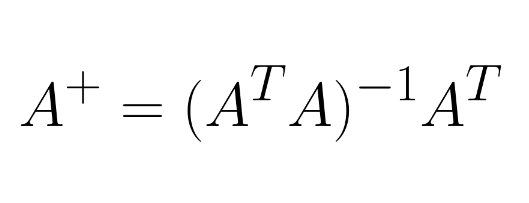

In [103]:
A = train.iloc[:, 1:]
A.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,Bias
14473,4,2.5,2180,6500,2.0,1410,1945,1
8976,4,2.5,2980,8786,2.0,2980,2003,1
13257,4,1.0,1460,16638,1.0,1460,1975,1
275,4,2.5,2160,9528,2.0,2160,1992,1
19982,3,2.5,2310,7348,1.0,2310,2010,1


In [104]:
#Pseudoinverse of A
A = np.array(A)
print(A.shape)
A_dag = np.matmul(np.linalg.inv(np.matmul(A.T, A)), A.T)
print(A_dag.shape)

(15102, 8)
(8, 15102)


Now we define, our theta vector and our y vector.

In [105]:
y = train.iloc[:, :1]
y.head()

,price
14473,435000.0
8976,382500.0
13257,162000.0
275,360000.0
19982,739000.0


In [106]:
y = np.array(y)
y.shape

(15102, 1)

In [107]:
print(A_dag.shape, y.shape)

(8, 15102) (15102, 1)


In [108]:
thetas = np.matmul(A_dag, y)
thetas

array([[-6.68295167e+04],
       [ 7.24541687e+04],
       [ 2.94271232e+02],
       [-3.74660558e-01],
       [ 4.67679920e+04],
       [ 1.24039798e+01],
       [-3.41795439e+03],
       [ 6.64963879e+06]])

#### Now that we've got our weight vector Thetas, we use it to check our testing data.

In [109]:
X = np.array(test.iloc[:, 1:])
y = np.array(test.iloc[:, :1])
print(X.shape, y.shape)

(6473, 8) (6473, 1)


In [110]:
print(X.shape, thetas.shape)

(6473, 8) (8, 1)


In [115]:
y_hat = np.round(np.matmul(X, thetas))
y_hat.shape

(6473, 1)

In [117]:
print(y_hat)

[[ 559835.]
 [ 635482.]
 [1058838.]
 ...
 [ 309407.]
 [ 801602.]
 [ 534567.]]


In [118]:
for i in range(len(y_hat)):
    print(y[i], y_hat[i])

[539000.] [559835.]
[650000.] [635482.]
[1260000.] [1058838.]
[167000.] [162476.]
[2570000.] [1257263.]
[455000.] [396483.]
[295000.] [498014.]
[595000.] [360294.]
[440000.] [745974.]
[775000.] [784703.]
[680000.] [754878.]
[382000.] [239780.]
[599900.] [537314.]
[538000.] [817759.]
[559630.] [804879.]
[260000.] [533245.]
[301000.] [618033.]
[439108.] [198257.]
[1330000.] [1074577.]
[525000.] [272746.]
[1440000.] [889595.]
[505000.] [485177.]
[765000.] [269896.]
[180000.] [73065.]
[410000.] [341485.]
[1620000.] [1026794.]
[355425.] [816343.]
[585000.] [961597.]
[733500.] [768713.]
[449500.] [238163.]
[810000.] [774134.]
[225900.] [312509.]
[1040000.] [1065919.]
[155000.] [270856.]
[307700.] [412621.]
[662990.] [442045.]
[373000.] [388107.]
[609000.] [1075875.]
[785000.] [456049.]
[427000.] [613139.]
[385000.] [460911.]
[510000.] [511584.]
[643403.] [674427.]
[315000.] [409097.]
[270000.] [458237.]
[875000.] [695174.]
[720000.] [886048.]
[650000.] [326935.]
[520000.] [737256.]
[390000.]

[327000.] [271095.]
[844000.] [838770.]
[550000.] [599884.]
[595000.] [481209.]
[275000.] [333320.]
[286300.] [584077.]
[850000.] [596100.]
[609000.] [539190.]
[319950.] [308717.]
[339950.] [396069.]
[795000.] [786446.]
[275000.] [582762.]
[219950.] [330537.]
[477500.] [450935.]
[299000.] [177645.]
[435000.] [471021.]
[1570000.] [1741490.]
[259000.] [460865.]
[400000.] [369043.]
[702000.] [663907.]
[1040000.] [1222000.]
[276000.] [591026.]
[1420000.] [988718.]
[249950.] [206613.]
[280000.] [297133.]
[400000.] [521144.]
[319000.] [630231.]
[429000.] [626870.]
[366350.] [506541.]
[235000.] [294263.]
[344950.] [640423.]
[535000.] [469714.]
[805000.] [716581.]
[396000.] [689819.]
[251000.] [309815.]
[450000.] [623667.]
[484259.] [645096.]
[940000.] [723764.]
[889000.] [1123922.]
[583000.] [631923.]
[860000.] [578279.]
[800000.] [1092732.]
[255000.] [434995.]
[269000.] [413389.]
[382000.] [281968.]
[677000.] [675798.]
[1200000.] [824517.]
[343566.] [292288.]
[210000.] [422370.]
[430000.] [2

[1220000.] [740795.]
[450000.] [497011.]
[354900.] [352864.]
[351000.] [555432.]
[404000.] [505696.]
[322000.] [337566.]
[545000.] [443000.]
[600000.] [505340.]
[500000.] [585365.]
[420000.] [483495.]
[1200000.] [758455.]
[274950.] [331697.]
[332500.] [463500.]
[585000.] [453096.]
[355000.] [291663.]
[446000.] [705089.]
[272000.] [403000.]
[301000.] [204467.]
[234950.] [259906.]
[326500.] [163947.]
[443600.] [362577.]
[555500.] [142629.]
[600000.] [433677.]
[184900.] [187765.]
[640000.] [634473.]
[575000.] [393023.]
[325000.] [285231.]
[889950.] [733192.]
[200000.] [208744.]
[320000.] [709304.]
[294900.] [385787.]
[419950.] [279486.]
[345000.] [317431.]
[459000.] [459566.]
[875000.] [1285714.]
[349900.] [333826.]
[263000.] [399020.]
[235000.] [440816.]
[231000.] [266321.]
[805000.] [876831.]
[995000.] [595263.]
[550000.] [342905.]
[365000.] [302221.]
[1150000.] [819441.]
[390000.] [381685.]
[1120000.] [1167835.]
[290500.] [632045.]
[674600.] [599072.]
[379950.] [447030.]
[525000.] [347

In [119]:
def checkMSE(y, y_hat):
    error = np.sum((y-y_hat)**2)/len(y)
    return error

In [120]:
checkMSE(y, y_hat)

59986483409.92121

# Now let's Calculate the Pseudo-Inverse using Singular Value Decomposition

In [215]:
U, sigma, V = np.linalg.svd(A, full_matrices=False)

In [216]:
y = np.array(train.iloc[:, :1])

In [217]:
print(U.shape, sigma.shape, V.shape)

(15102, 8) (8,) (8, 8)


In [218]:
sigma = np.array(np.diag(sigma))
print(sigma)
sigma.shape

[[5.34823390e+06 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 3.99052713e+05 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 8.05758740e+04 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 3.75867232e+04
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  9.48510235e+01 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 6.73049835e+01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 4.39137178e+01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.48470838e+00]]

(8, 8)

We now use U, Sigma and V to calculate the pseudo-inverse matrix.

### A_dagger = V.SigmaInverse.Uinverse 
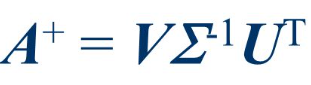

In [219]:
print(np.matmul(V, np.linalg.inv(sigma)).shape)
print(U.T.shape)

(8, 8)
(8, 15102)


In [220]:
A_dag = np.matmul(np.matmul(V.T, np.linalg.inv(sigma)), U.T)

In [221]:
A_dag.shape

(8, 15102)

In [222]:
print(A_dag.shape, y.shape)
thetas = np.matmul(A_dag, y)
thetas.shape

(8, 15102) (15102, 1)


(8, 1)

In [223]:
X = np.array(test.iloc[:, 1:])
y = np.array(test.iloc[:, :1])
print(X.shape, y.shape)

(6473, 8) (6473, 1)


In [224]:
print(X.shape, thetas.shape)

(6473, 8) (8, 1)


In [225]:
y_hat = np.round(np.matmul(X, thetas))
y_hat.shape

(6473, 1)

In [226]:
for i in range(len(y_hat)):
    print(y[i], y_hat[i])

[539000.] [559835.]
[650000.] [635482.]
[1260000.] [1058838.]
[167000.] [162476.]
[2570000.] [1257263.]
[455000.] [396483.]
[295000.] [498014.]
[595000.] [360294.]
[440000.] [745974.]
[775000.] [784703.]
[680000.] [754878.]
[382000.] [239780.]
[599900.] [537314.]
[538000.] [817759.]
[559630.] [804879.]
[260000.] [533245.]
[301000.] [618033.]
[439108.] [198257.]
[1330000.] [1074577.]
[525000.] [272746.]
[1440000.] [889595.]
[505000.] [485177.]
[765000.] [269896.]
[180000.] [73065.]
[410000.] [341485.]
[1620000.] [1026794.]
[355425.] [816343.]
[585000.] [961597.]
[733500.] [768713.]
[449500.] [238163.]
[810000.] [774134.]
[225900.] [312509.]
[1040000.] [1065919.]
[155000.] [270856.]
[307700.] [412621.]
[662990.] [442045.]
[373000.] [388107.]
[609000.] [1075875.]
[785000.] [456049.]
[427000.] [613139.]
[385000.] [460911.]
[510000.] [511584.]
[643403.] [674427.]
[315000.] [409097.]
[270000.] [458237.]
[875000.] [695174.]
[720000.] [886048.]
[650000.] [326935.]
[520000.] [737256.]
[390000.]

[546000.] [368065.]
[600000.] [582494.]
[279900.] [358855.]
[380950.] [422345.]
[400000.] [674886.]
[500000.] [619781.]
[750000.] [776821.]
[545000.] [483006.]
[1050000.] [812694.]
[261000.] [383817.]
[468500.] [274701.]
[272500.] [292579.]
[312500.] [393113.]
[608000.] [351768.]
[390000.] [217688.]
[390000.] [404332.]
[359950.] [381189.]
[493000.] [503610.]
[1320000.] [637347.]
[365000.] [210640.]
[450000.] [348815.]
[625000.] [634906.]
[135000.] [175829.]
[180000.] [213074.]
[353000.] [225250.]
[249900.] [351286.]
[415000.] [439377.]
[405000.] [358219.]
[745000.] [866339.]
[710000.] [744967.]
[250000.] [147085.]
[669000.] [535703.]
[582500.] [533269.]
[440000.] [298647.]
[605000.] [362093.]
[500000.] [490575.]
[310000.] [338112.]
[394000.] [413158.]
[699000.] [456038.]
[300000.] [575059.]
[241450.] [241073.]
[222000.] [306945.]
[229500.] [591080.]
[1470000.] [1391076.]
[525000.] [345667.]
[520000.] [367616.]
[1780000.] [1114711.]
[667750.] [385800.]
[921000.] [527293.]
[463800.] [175

[320000.] [466477.]
[496800.] [344975.]
[245000.] [422878.]
[255000.] [258565.]
[792500.] [712026.]
[689800.] [440033.]
[281000.] [342419.]
[2000000.] [1283848.]
[299500.] [158752.]
[2000000.] [998039.]
[556000.] [606355.]
[255000.] [752995.]
[219950.] [278219.]
[248000.] [201112.]
[730000.] [654445.]
[327500.] [609701.]
[750000.] [941689.]
[316000.] [451883.]
[491000.] [480576.]
[518000.] [502569.]
[770000.] [737962.]
[330000.] [525700.]
[287000.] [708779.]
[980000.] [1120525.]
[450000.] [381231.]
[240000.] [358217.]
[369000.] [561828.]
[398000.] [395126.]
[479950.] [454305.]
[589000.] [579285.]
[689800.] [774560.]
[302000.] [276649.]
[900000.] [1027001.]
[462500.] [359468.]
[420000.] [263450.]
[723000.] [963079.]
[550000.] [488351.]
[560000.] [413051.]
[499950.] [748988.]
[275000.] [344462.]
[463000.] [664731.]
[317000.] [410321.]
[890000.] [752515.]
[440000.] [639658.]
[699800.] [601209.]
[2700000.] [1311857.]
[825000.] [536168.]
[545000.] [579935.]
[306000.] [428281.]
[320000.] [35

[449950.] [762053.]
[495000.] [508485.]
[210000.] [244426.]
[362000.] [440856.]
[699000.] [840972.]
[616000.] [386104.]
[249000.] [256112.]
[285000.] [661158.]
[289999.] [439656.]
[842000.] [524309.]
[875000.] [878437.]
[382888.] [397165.]
[658000.] [239787.]
[274950.] [330569.]
[696000.] [480803.]
[453500.] [462519.]
[200000.] [234877.]
[425000.] [668183.]
[797000.] [788797.]
[822500.] [836069.]
[630000.] [598399.]
[530000.] [574279.]
[223000.] [178222.]
[433500.] [317176.]
[550000.] [314106.]
[369900.] [507983.]
[179950.] [232521.]
[345000.] [317996.]
[269950.] [456896.]
[721000.] [753333.]
[850000.] [502262.]
[315000.] [273473.]
[244000.] [222548.]
[359950.] [193800.]
[683000.] [654822.]
[762500.] [767780.]
[988830.] [1019748.]
[490000.] [676475.]
[780000.] [1097029.]
[650000.] [447036.]
[650000.] [706046.]
[345000.] [105680.]
[425000.] [593634.]
[660000.] [598566.]
[370000.] [656806.]
[405000.] [353275.]
[190000.] [379075.]
[520000.] [568349.]
[685000.] [395679.]
[315000.] [267292.

In [227]:
def checkMSE(y, y_hat):
    error = np.sum((y-y_hat)**2)/len(y)
    return error

In [228]:
checkMSE(y, y_hat)

59986483409.92121

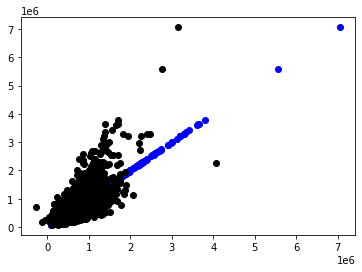

In [229]:
plt.scatter(x=y, y=np.array(y), color='blue')
plt.scatter(x=y_hat, y=np.array(y), color='black')